<font color=orange>**Python Hackathon December 2023**</center></font>

<div class="alert alert-block alert-success">
<b><p><h1><center>Team 8 : Python Pioneers </center></h1> </p></b> 
</div>

<div class="alert alert-block alert-info">
<b><h3><center>Exam Stress Exploratory Data Analysis</center></h3></b> 
</div>

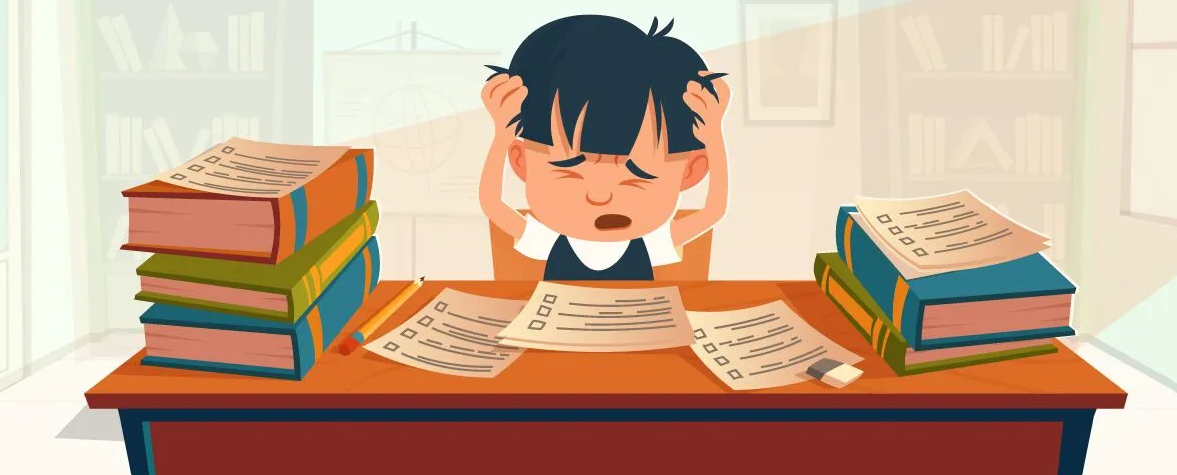

**<h3>Table of Content</h3>**
- [x] Importing Data and Libraries
- [x] Data cleaning and Data-wrangling
- [x] Additional Analysis of Exam Stress Dataset
- [x] Reference

# Importing Data and Libraries

<h4>Python Libraries used for our Anlayis</h4>

In [51]:
# pip install panda
# pip install matplotlib
# pip install numpy
# pip install seaborn
# pip install colorama
# pip install wordcloud
# pip install plotly


In [52]:
import pandas as pd
import numpy as np
import random
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Data cleaning and Data-wrangling

<div class="alert alert-block alert-warning"><h4>Importing Exam Stress Dataset</h4>
</div>

In [53]:
df_Demography =pd.read_excel("Exam Stress Final.xlsx",sheet_name="Demography")
df_Grades = pd.read_excel("Exam Stress Final.xlsx")
df_EDA =pd.read_excel("Exam Stress Final.xlsx",sheet_name="EDA")
df_HR =pd.read_excel("Exam Stress Final.xlsx",sheet_name="HR")
df_Temp =pd.read_excel("Exam Stress Final.xlsx",sheet_name="Temp")
df_IBI=pd.read_excel("Exam Stress Final.xlsx",sheet_name="IBI")

<div class="alert alert-block alert-warning"><h4>1. Analysing columns of Demographics</h4>

</div>

In [54]:
df_Demography.columns

Index(['Student_id', 'DOB', 'First Name', 'Last Name', 'Gender', 'Race'], dtype='object')

<div class="alert alert-block alert-warning"><h4>2. Analysis of null fields</h4>

</div>

In [55]:
print("DEMOGRAPHICS DETAILS\n\n",df_Demography.info())
print("STUDENT GRADES",df_Grades.info())
print("EDA DETAILS\n",df_EDA.info())
print("HR DETAILS\n",df_HR.info())
print("BODY TEMPERATURE DETAILS\n",df_Temp.info())
print("IBI DETAILS\n",df_IBI.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Student_id  10 non-null     object        
 1   DOB         10 non-null     datetime64[ns]
 2   First Name  10 non-null     object        
 3   Last Name   10 non-null     object        
 4   Gender      10 non-null     object        
 5   Race        10 non-null     object        
dtypes: datetime64[ns](1), object(5)
memory usage: 608.0+ bytes
DEMOGRAPHICS DETAILS

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Student_id  10 non-null     object
 1   Midterm 1   10 non-null     int64 
 2   Midterm 2   10 non-null     int64 
 3   final       10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes
STUDENT GRADES None
<class 

<div class="alert alert-block alert-warning"><h4>Results:</h4>
 Analysis shows that HR table contains null values
</div>

<div class="alert alert-block alert-warning"><h4> 3. Filling missing values in the HR table</h4>

</div>

In [56]:
# Fill missing values in the DataFrame 'grouped_data'.
# The method 'fillna()' is used to handle NaN (Not a Number) values.
# Use the 'bfill' (backward fill) method to replace NaN values.

df_HR = df_HR.fillna(method='bfill')
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7374 entries, 0 to 7373
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HR            7372 non-null   float64
 1   Time in mins  7372 non-null   float64
 2   Student_id    7372 non-null   object 
 3   Exam          7374 non-null   object 
dtypes: float64(2), object(2)
memory usage: 230.6+ KB


<div class="alert alert-block alert-warning"><h4>Results:</h4>
 Null values in the HR table filled with fillna() method.
</div>

<div class="alert alert-block alert-warning"><h4> 4.Checking for Duplicated records</h4>

</div>

In [57]:
# Using the `duplicated` method to identify duplicate rows in the DataFrame `df`.
# By default, it checks for duplicates across all columns and marks duplicates as True for all except the first occurrence.

duplicates_demo = df_Demography.duplicated()
dupli_demo_count= duplicates_demo.sum()

duplicates_hr = df_HR.duplicated()
dupli_hr_count= duplicates_hr.sum() 
print("Number duplicated records in Demographics:",dupli_demo_count)
print("Number duplicated records in HR:",dupli_hr_count)
# The resulting `duplicates` is a Boolean Series with True indicating duplicate rows.

Number duplicated records in Demographics: 0
Number duplicated records in HR: 1


<div class="alert alert-block alert-warning"><h4>Results:</h4>
No Duplicated records in the Demographics Table , 1 Duplicated record in the HR table
</div>

<div class="alert alert-block alert-warning"><h4> 5.Droping duplicated Records</h4>

</div>

In [58]:
# Using the `drop_duplicates` method to remove duplicate rows from the DataFrame `HR` 
# By default, it keeps the first occurrence of each set of duplicates and returns a new DataFrame with duplicates removed.

df_HR.drop_duplicates(inplace=True)
hr_dupli = df_HR.duplicated().sum()
print("Duplicates Removed from HR Table")

Duplicates Removed from HR Table


<div class="alert alert-block alert-warning"><h4>Results:</h4>
Duplicated records from the HR table has been removed
</div>

#  Additional Analysis of Exam Stress Dataset

<div class="alert alert-block alert-warning">
<b>Q1 :</b> Create a pair plot on HR,temperature and IBI based on gender. </font>
</div>

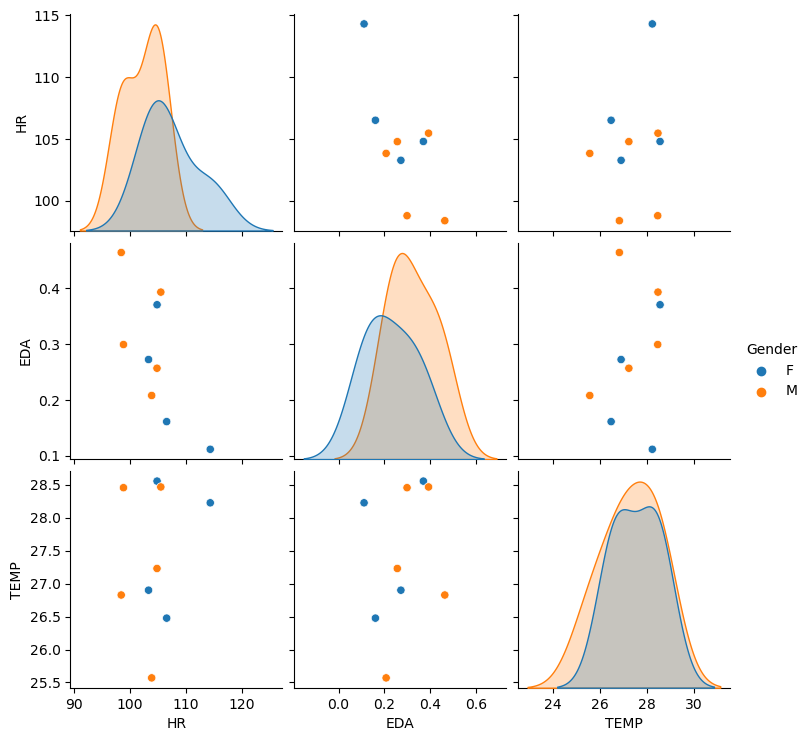

In [65]:
heart_rate = df_HR[['Student_id','HR']]
eda=df_EDA[['Student_id','EDA']]
temp=df_Temp[['Student_id','TEMP']]
# Group by 'StudentID' and calculate the average hr,eda,temp for each student
average_hr_per_student = heart_rate.groupby('Student_id')['HR'].mean().reset_index()
average_eda_per_student = eda.groupby('Student_id')['EDA'].mean().reset_index()
average_temp_per_student = temp.groupby('Student_id')['TEMP'].mean().reset_index()

# Merge dataframes on 'Student_id'
merged_df1 = pd.merge(average_hr_per_student, average_eda_per_student, on='Student_id')
merged_df2 = pd.merge(merged_df1, average_temp_per_student, on='Student_id')
merge_gender =pd.merge(merged_df2,df_Demography,on='Student_id')

sns.pairplot(merge_gender, hue='Gender')

# Reference


- [x] __[Exploratory Data Analysis](https://www.indeed.com/career-advice/career-development/how-to-conduct-exploratory-data-analysis)__

